In [1]:
import numpy as np
import pandas as pd
import os, sys

from datetime import datetime, time

import matplotlib.pyplot as plt

import supermag_api

import re


In [2]:
def get_sm_one_minute(start,end):

    '''

    
    Dependencies
        supermag-api downloadable from https://supermag.jhuapl.edu/mag/?fidelity=low&start=2001-01-01T00%3A00%3A00.000Z&interval=1%3A00%3A00&tab=api
            --> one should move this to the working directory and rename to supermag_api
        datetime
            
    Notes
        it appears this will only work for a few-day request; for longer periods, need to download the data directly
            
    '''


#     import supermag_api
#     import datetime

    start_datetime = pd.to_datetime(start)
    end_datetime = pd.to_datetime(end)
    
    # get the number of days between start and end
    num_days = (end_datetime - start_datetime).days
    print('the number of days that will be requested is {}'.format(num_days))
    input('Press Enter if you are sure you want to ping the SuperMAG API for this...')
    
    # get correct format for 'start date'
    date_obj_start = datetime.strptime(start, '%Y-%m-%d %H:%M:%S')
    formatted_start = date_obj_start.strftime('%Y-%m-%dT%H:%M')

    (status,df_smidxs) = supermag_api.SuperMAGGetIndices('rymc1012',formatted_start,86400*num_days,'SME, SMU, SML, SMR')

    datetimes_sm = [pd.to_datetime(t, unit='s') for t in df_smidxs['tval']]

    df_smidxs['datetimes'] = datetimes_sm
    df_smidxs = df_smidxs.set_index(['datetimes'])
    df_smidxs.index = pd.to_datetime(df_smidxs.index)
    
    return df_smidxs





In [5]:
# read in outages (working with 2023, for now)
outage_directory = '/Users/ryanmc/Documents/Conferences/Jack_Eddy_Symposium_2022/dev/outage_data/'

eaglei = pd.read_csv(os.path.join(outage_directory,'EAGLE-I/eaglei_outages_2015.csv'))
eaglei = eaglei[eaglei['customers_out']>1000]


In [8]:
eaglei

,fips_code,county,state,customers_out,run_start_time
5,5119,Pulaski,Arkansas,1657,2015-01-01 00:00:00
9,6065,Riverside,California,2395,2015-01-01 00:00:00
31,12085,Martin,Florida,1583,2015-01-01 00:00:00
245,55125,Vilas,Wisconsin,1349,2015-01-01 00:00:00
252,5119,Pulaski,Arkansas,1664,2015-01-01 00:15:00
...,...,...,...,...,...
12939034,40051,Grady,Oklahoma,3821,2015-12-31 00:00:00
12939039,40073,Kingfisher,Oklahoma,1649,2015-12-31 00:00:00
12939045,40109,Oklahoma,Oklahoma,2617,2015-12-31 00:00:00
12939093,47163,Sullivan,Tennessee,1213,2015-12-31 00:00:00


In [13]:
eaglei['run_start_time'].iloc[0]

'2015-01-01 00:00:00'

In [15]:
dt_start = pd.to_datetime(eaglei['run_start_time'].iloc[0])

In [21]:
sm_data = get_sm_one_minute((dt_start - pd.Timedelta(hours=24)).strftime('%Y-%-m-%-d %H:%M:%S'),
                                (dt_start))

the number of days that will be requested is 1


Press Enter if you are sure you want to ping the SuperMAG API for this... 


In [82]:
(f"{sm_data.iloc[0]['<year>']})

SyntaxError: EOL while scanning string literal (3349176863.py, line 1)

In [83]:
sm_data


,<year>,<month>,<day>,<hour>,<min>,<sec>,<SME (nT)>,<SML (nT)>,<SMU (nT)>,<SMR (nT)>,<BxGSM (nT)>,<ByGSM (nT)>,<BzGSM (nT)>,<Dyn. Pres. (nPa)>,<Newell CF (Wb/s)>
0,2015,1,1,0,0,0,73,-38,35,2.4,6.34,-2.24,1.67,1.6,1003.0
1,2015,1,1,0,1,0,77,-42,35,2.6,5.26,-2.16,1.17,1.6,1003.0
2,2015,1,1,0,2,0,85,-50,35,2.8,4.79,-2.82,1.01,1.6,1308.5
3,2015,1,1,0,3,0,81,-46,35,2.9,5.11,-2.97,0.94,1.6,2052.3
4,2015,1,1,0,4,0,74,-39,35,3.0,5.25,-3.31,1.23,1.7,2264.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
525595,2015,12,31,23,55,0,1331,-1055,275,-93.4,4.72,3.01,-14.35,1.0,20667.2
525596,2015,12,31,23,56,0,1427,-1161,266,-92.8,4.77,3.03,-14.29,0.9,20650.6
525597,2015,12,31,23,57,0,1220,-970,250,-92.9,4.79,3.04,-14.29,1.0,20582.0
525598,2015,12,31,23,58,0,1203,-965,238,-92.9,4.85,3.01,-14.26,1.0,20556.8


In [95]:
# read in SuperMAG data 
sm_directory = '/Users/ryanmc/Documents/Conferences/Jack_Eddy_Symposium_2022/dev/supermag_data/'
sm_data = pd.read_csv(os.path.join(sm_directory,'supermag_indices_2015.txt'),header=0,delimiter='\t')

# # Print the first few rows to check
# sm_data


# sm_data = sm_data.apply(pd.to_numeric, errors='coerce')
# # sm_data['datetime'] = pd.to_datetime(sm_data[['<year>', '<month>', '<day>', '<hour>', '<min>', '<sec>']])
# sm_datetimes = [pd.to_datetime(x['<year>'].values,x['<month>'].values,x['<day>'].values,x['<hour>'].values,x['<min>'].values,x['<sec>'].values) for x in sm_data]
# sm_data['datetime'] = sm_datetimes

# sm_data['datetime'] = sm_data.apply(
#     lambda x: pd.to_datetime(f"{str(x['<year>']})-{x['<month>']}-{x['<day>']} {x['<hour>']}:{x['<min>']}:{x['<sec>']}"),
#     axis=1
# )

In [96]:
# Looping (TODO - COULD JUST DEFINE ONE-MINUTE DATETIME SEQUENCE AND APPEND IT!)
sm_datetime = []
for x in range(len(sm_data)):
    dt_loop = pd.to_datetime(str(int(sm_data.iloc[x]['<year>']))+'-'+str(int(sm_data.iloc[x]['<month>']))+'-'+str(int(sm_data.iloc[x]['<day>']))+' '+str(int(sm_data.iloc[x]['<hour>']))+':'+str(int(sm_data.iloc[x]['<min>']))+':'+str(int(sm_data.iloc[x]['<sec>'])) )
    sm_datetime.append(dt_loop)


In [99]:
sm_data['datetimes'] = sm_datetime

In [100]:
sm_data

,<year>,<month>,<day>,<hour>,<min>,<sec>,<SME (nT)>,<SML (nT)>,<SMU (nT)>,<SMR (nT)>,<BxGSM (nT)>,<ByGSM (nT)>,<BzGSM (nT)>,<Dyn. Pres. (nPa)>,<Newell CF (Wb/s)>,datetimes
0,2015,1,1,0,0,0,73,-38,35,2.4,6.34,-2.24,1.67,1.6,1003.0,2015-01-01 00:00:00
1,2015,1,1,0,1,0,77,-42,35,2.6,5.26,-2.16,1.17,1.6,1003.0,2015-01-01 00:01:00
2,2015,1,1,0,2,0,85,-50,35,2.8,4.79,-2.82,1.01,1.6,1308.5,2015-01-01 00:02:00
3,2015,1,1,0,3,0,81,-46,35,2.9,5.11,-2.97,0.94,1.6,2052.3,2015-01-01 00:03:00
4,2015,1,1,0,4,0,74,-39,35,3.0,5.25,-3.31,1.23,1.7,2264.9,2015-01-01 00:04:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
525595,2015,12,31,23,55,0,1331,-1055,275,-93.4,4.72,3.01,-14.35,1.0,20667.2,2015-12-31 23:55:00
525596,2015,12,31,23,56,0,1427,-1161,266,-92.8,4.77,3.03,-14.29,0.9,20650.6,2015-12-31 23:56:00
525597,2015,12,31,23,57,0,1220,-970,250,-92.9,4.79,3.04,-14.29,1.0,20582.0,2015-12-31 23:57:00
525598,2015,12,31,23,58,0,1203,-965,238,-92.9,4.85,3.01,-14.26,1.0,20556.8,2015-12-31 23:58:00


In [101]:
sm_data.replace(999999., np.nan, inplace=True)

In [115]:
np.nanmax(np.abs(filtered_sm_data['<SME (nT)>']))

1667

In [111]:
dt_start

Timestamp('2015-01-01 00:00:00')

In [121]:
# get solar wind and supermag data for these outages
dt_save = []
SME_save = []
SMU_save = []
SML_save = []
SMR_save = []

for w in range(len(eaglei)):
    # get start times
    try:
        dt_start = pd.to_datetime(eaglei['run_start_time'].iloc[w])
    except:
        dt_start = np.nan
        dt_save.append(np.nan)
        SME_save.append(np.nan)
        SMU_save.append(np.nan)
        SML_save.append(np.nan)
        SMR_save.append(np.nan)
        continue
    
    # Filter for rows within 24 hours before the target datetime
    filtered_sm_data = sm_data[(sm_data['datetimes'] >= dt_start - pd.Timedelta(hours=6)) & 
                         (sm_data['datetimes'] <= dt_start)]

    # Save
    SME_save.append(np.nanmax(filtered_sm_data['<SME (nT)>']))
    SMU_save.append(np.nanmax(np.abs(filtered_sm_data['<SMU (nT)>'])))
    SML_save.append(np.nanmax(filtered_sm_data['<SML (nT)>']))
    SMR_save.append(np.nanmax(np.abs(filtered_sm_data['<SMR (nT)>'])))
    dt_save.append(dt_start)

In [122]:
eaglei['datetime']=dt_save
eaglei['SME']=SME_save
eaglei['SMU']=SMU_save
eaglei['SML']=SML_save
eaglei['SMR']=SMR_save

    

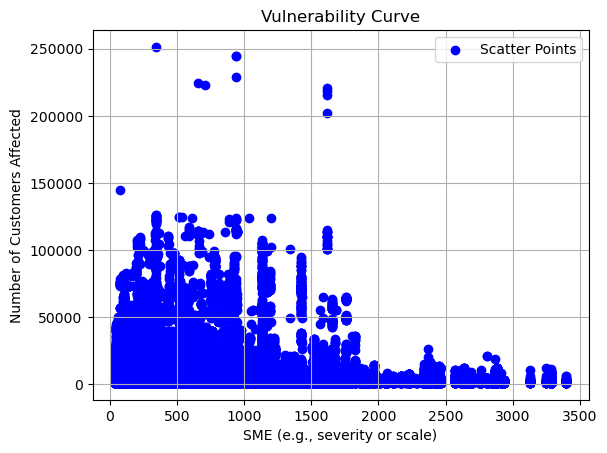

In [126]:
from scipy.interpolate import make_interp_spline

# Extract x and y values
x = eaglei["SME"].values
y = eaglei["customers_out"].values

# # Create a smooth curve using spline interpolation
# x_smooth = np.linspace(x.min(), x.max(), 200)  # Smooth x-axis points
# spl = make_interp_spline(x, y, k=3)  # Cubic spline
# y_smooth = spl(x_smooth)

# Plot the scatter points
plt.scatter(x, y, color="blue", label="Scatter Points")

# # Plot the vulnerability curve
# plt.plot(x_smooth, y_smooth, color="red", label="Vulnerability Curve")

# Add labels, title, and legend
plt.xlabel("SME (e.g., severity or scale)")
plt.ylabel("Number of Customers Affected")
plt.title("Vulnerability Curve")
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

In [129]:
from matplotlib.colors import LogNorm

Text(0.5, 1.0, 'Vulnerability Data')

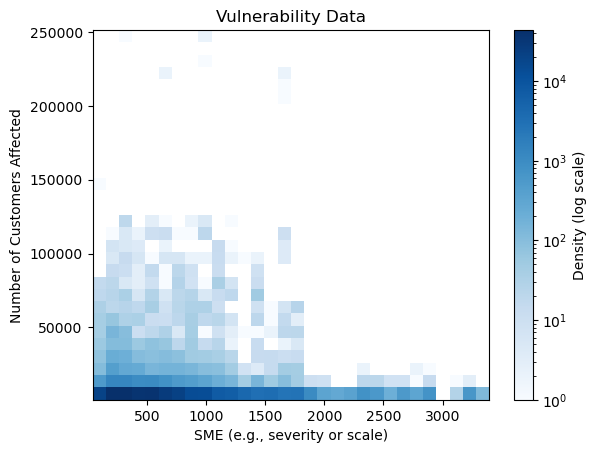

In [144]:
# Create 2D histogram
plt.hist2d(x, y, bins=30, norm=LogNorm(), cmap='Blues')

# Add color bar
cb = plt.colorbar()
cb.set_label('Density (log scale)')

# Add labels and title
plt.xlabel("SME (e.g., severity or scale)")
plt.ylabel("Number of Customers Affected")
plt.title("Vulnerability Data")

# Show plot

In [140]:
from scipy.optimize import curve_fit

/var/folders/56/vhtxcmr565z5ksdt3g3px27w0000gq/T/ipykernel_39273/3869647328.py:3: RuntimeWarning: overflow encountered in exp
  return a * np.exp(b * x) + c
/Users/ryanmc/opt/anaconda3/envs/spwxr_network/lib/python3.9/site-packages/scipy/optimize/_minpack_py.py:862: RuntimeWarning: overflow encountered in square
  cost = np.sum(infodict['fvec'] ** 2)
/var/folders/56/vhtxcmr565z5ksdt3g3px27w0000gq/T/ipykernel_39273/3869647328.py:18: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  plt.scatter(x, y, label='Original Data', alpha=0.6, color='blue',norm=LogNorm(), cmap='Blues')
/var/folders/56/vhtxcmr565z5ksdt3g3px27w0000gq/T/ipykernel_39273/3869647328.py:19: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  plt.scatter(x_unique, y_aggregated, label='Aggregated Data (Mean)', color='orange',norm=LogNorm(), cmap='Reds')


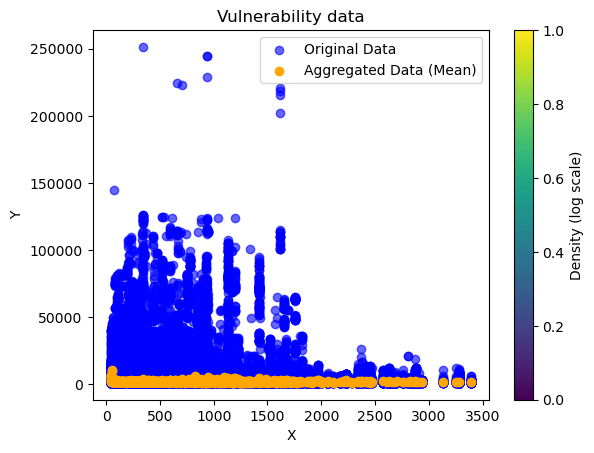

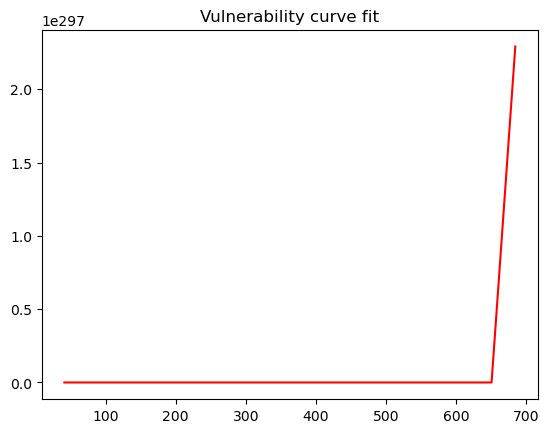

In [143]:
# Define a function to fit (e.g., quadratic here as an example)
def func(x, a, b, c):
    return a * np.exp(b * x) + c

# Aggregate repeated x-values by taking the mean of y-values
x_unique = np.unique(x)
y_aggregated = np.array([np.median(y[x == xi]) for xi in x_unique])

# Fit the function to the aggregated data
popt, pcov = curve_fit(func, x_unique, y_aggregated)

# Generate smooth x values for plotting the fitted curve
x_fit = np.linspace(min(x), max(x), 100)
y_fit = func(x_fit, *popt)

# Plot the original data
plt.figure()
plt.scatter(x, y, label='Original Data', alpha=0.6, color='blue',norm=LogNorm(), cmap='Blues')
plt.scatter(x_unique, y_aggregated, label='Aggregated Data (Mean)', color='orange',norm=LogNorm(), cmap='Reds')

# Add color bar
cb = plt.colorbar()
cb.set_label('Density (log scale)')

# Add labels and legend
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.title('Vulnerability data')
plt.show()

plt.figure()
# Plot the fitted curve
plt.plot(x_fit, y_fit, label=f'Fitted Curve: y = {popt[0]:.2f}x² + {popt[1]:.2f}x + {popt[2]:.2f}', color='red')
plt.title('Vulnerability curve fit')
plt.show()


In [138]:
x


array([ 73,  73,  73, ..., 319, 319, 319])